In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import datetime

In [2]:
#SF Covid Case Data
#read case data into a pandas dataframe
sf_covid_case = pd.read_csv('Covid-19_Tests.csv')
#drop columns not of interest
sf_covid_case = sf_covid_case.drop(columns=['tests', 'pct', 'neg', 'indeterminate', 'Last Updated At', 'data_loaded_at'])
#rename the specimen_collection_date column into date
sf_covid_case = sf_covid_case.rename(columns = {'specimen_collection_date': 'date'})
#rename the pos column into cases
sf_covid_case = sf_covid_case.rename(columns = {'pos': 'cases'})
#convert the date column from string to datetime
sf_covid_case['date'] = pd.to_datetime(sf_covid_case['date']).dt.date
#sort the dataframe by date
sf_covid_case = sf_covid_case.sort_values(by="date")

#SF Covid Death Data
#read death data into a pandas dataframe
sf_covid_death = pd.read_csv('COVID-19_Deaths_Over_Time.csv')
#create date column that contains only the date of the Date of Death column
sf_covid_death['date'] = sf_covid_death['Date of Death'].str.split(" ").str[0]
#drop columns not of interest
sf_covid_death = sf_covid_death.drop(columns=['Date of Death', 'Cumulative Deaths', 'Data As Of', 'Data Loaded At'])
#convert the date column from string to datetime
sf_covid_death['date'] = pd.to_datetime(sf_covid_death['date']).dt.date
#rename the New Deaths column into deaths
sf_covid_death = sf_covid_death.rename(columns = {'New Deaths': 'deaths'})
#sort the dataframe by date
sf_covid_death = sf_covid_death.sort_values(by="date")



#SF Covid Vaccine Data
#read vaccine data into a pandas dataframe
sf_covid_vaccine = pd.read_csv('COVID_Vaccinations_Given_to_SF_Residents_Over_Time.csv')
#create new column vaccines that represents the sum of total doses of vaccine given each day
sf_covid_vaccine['vaccines'] = sf_covid_vaccine['NEW_1ST_DOSES'] + sf_covid_vaccine['NEW_2ND_DOSES'] + sf_covid_vaccine['NEW_SINGLE_DOSES'] + sf_covid_vaccine['NEW_BOOSTER_DOSES'] 
#drop columns not of interest
sf_covid_vaccine = sf_covid_vaccine.drop(columns=['NEW_1ST_DOSES', 'NEW_2ND_DOSES', 'NEW_SINGLE_DOSES', 'NEW_SERIES_COMPLETED', 'NEW_RECIPIENTS', 'CUMULATIVE_1ST_DOSES', 'CUMULATIVE_2ND_DOSES', 'CUMULATIVE_SINGLE_DOSES', 'CUMULATIVE_SERIES_COMPLETED', 'CUMULATIVE_RECIPIENTS', 'NEW_BOOSTER_DOSES', 'NEW_BOOSTER_RECIPIENTS', 'CUMULATIVE_BOOSTER_DOSES', 'CUMULATIVE_BOOSTER_RECIPIENTS', 'DATA_AS_OF', 'DATA_UPDATED_AT', 'DATA_LOADED_AT'])
#rename the DATE_ADMINISTERED column into date
sf_covid_vaccine = sf_covid_vaccine.rename(columns = {'DATE_ADMINISTERED': 'date'})
#convert the date column from string to datetime
sf_covid_vaccine['date'] = pd.to_datetime(sf_covid_vaccine['date']).dt.date
#sort the dataframe by date
sf_covid_vaccine = sf_covid_vaccine.sort_values(by="date")




#Create new dataframe containing case, death, and vaccine data
#merge the three dataframes together based on the date column
sf_covid_case_death_vaccine = sf_covid_case.merge(sf_covid_death,how='left',on='date').merge(sf_covid_vaccine,how='left',on='date')




In [3]:
sf_covid_case_death_vaccine.head()

,date,cases,deaths,vaccines
0,2020-03-01,0,NaN,NaN
1,2020-03-02,0,NaN,NaN
2,2020-03-03,2,NaN,NaN
3,2020-03-04,0,NaN,NaN
4,2020-03-05,6,NaN,NaN


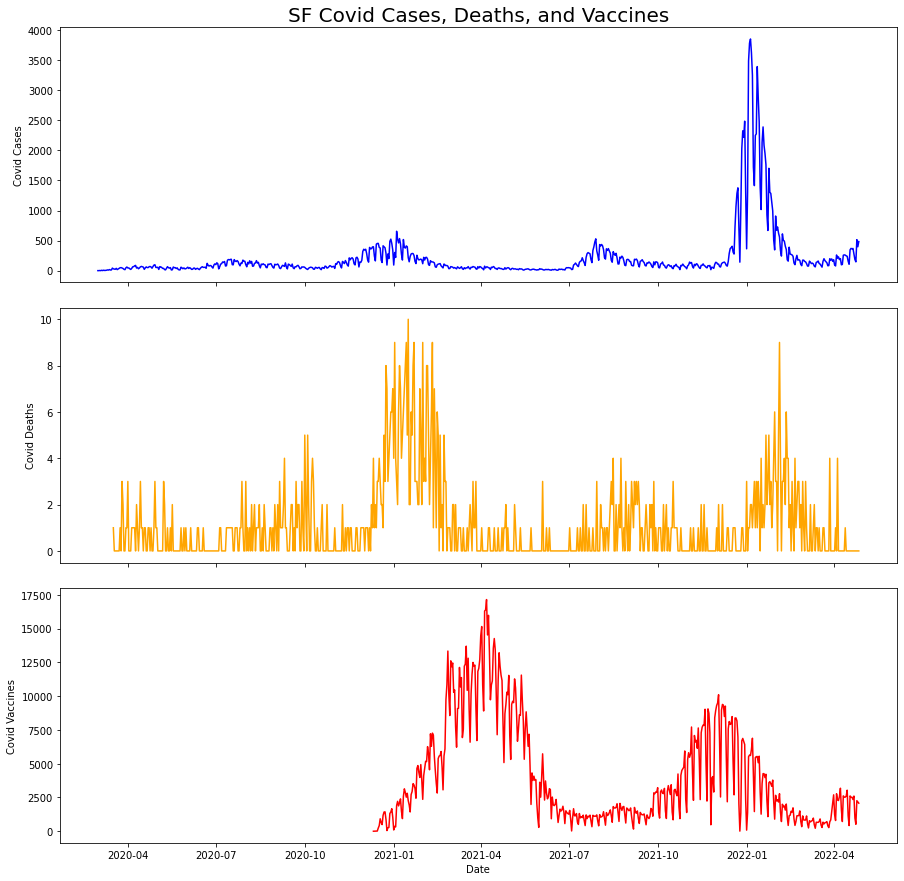

In [4]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False, figsize = (15, 15))

#top plot - covid cases
ax1.plot('date', 'cases', data=sf_covid_case_death_vaccine, color ='blue')
ax1.set_title('SF Covid Cases, Deaths, and Vaccines', fontsize=20)
ax1.set_ylabel('Covid Cases',fontsize=10)

#middle plot - covid deaths
ax2.plot('date','deaths', data=sf_covid_case_death_vaccine, color='orange')
ax2.set_ylabel('Covid Deaths',fontsize=10)

#bottom ploy - covid vaccines 
ax3.plot('date','vaccines', data=sf_covid_case_death_vaccine, color='red')
ax3.set_ylabel('Covid Vaccines',fontsize=10)
ax3.set_xlabel('Date',fontsize=10)

fig.subplots_adjust(hspace=0.1)



In [5]:
%matplotlib qt

l1 = sf_covid_case_death_vaccine['cases']
l2 = sf_covid_case_death_vaccine['deaths']
l3 = sf_covid_case_death_vaccine['vaccines']


fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False, figsize = (15, 15))

# set limits for x and y axis
ax1.set_ylim([sf_covid_case_death_vaccine['cases'].min(), sf_covid_case_death_vaccine['cases'].max()])
#ax1.set_xlim([sf_covid_case_death_vaccine['date'].min(), sf_covid_case_death_vaccine['date'].max()])
ax1.set_title('SF Covid Cases, Deaths, and Vaccines', fontsize=20)
ax1.set_ylabel('Covid Cases',fontsize=10)

ax2.set_ylim([sf_covid_case_death_vaccine['deaths'].min(), sf_covid_case_death_vaccine['deaths'].max()])
#ax2.set_xlim([sf_covid_case_death_vaccine['date'].min(), sf_covid_case_death_vaccine['date'].max()])
ax2.set_ylabel('Covid Deaths',fontsize=10)

ax3.set_ylim([sf_covid_case_death_vaccine['vaccines'].min(), sf_covid_case_death_vaccine['vaccines'].max()])
#ax3.set_xlim([sf_covid_case_death_vaccine['date'].min(), sf_covid_case_death_vaccine['date'].max()])
ax3.set_ylabel('Covid Vaccines',fontsize=10)
ax3.set_xlabel('Date',fontsize=10)



# create 5 list to get store element
# after every iteration
x, y1, y2, y3= [], [], [], []

def animate(i):
	x.append(sf_covid_case_death_vaccine['date'].min() + datetime.timedelta(days=(i-1)) )
	y1.append((l1[i]))
	y2.append((l2[i]))
	y3.append((l3[i]))


	ax1.plot(x, y1, color='blue')
	ax2.plot(x, y2, color='orange')
	ax3.plot(x, y3, color='red')

    
anim = FuncAnimation(fig, animate, interval=10, repeat=False)
  